# SC1015 Project                                                           

## Group members: Bryan, Seann, Wei Jie

### Objective: Find the correlation between risk of heart failure and various factors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (918, 12)


In [4]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


HeartFailure : 2
1    508
0    410
Name: HeartDisease, dtype: int64


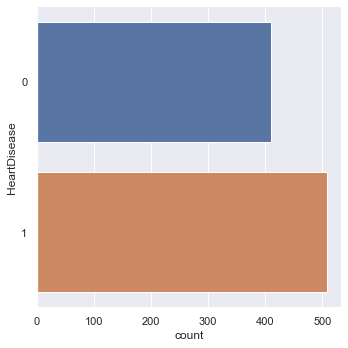

In [6]:
print("HeartFailure :", len(df["HeartDisease"].unique()))
# Get count of people with heart failure ()
print(df["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = df, kind = "count")

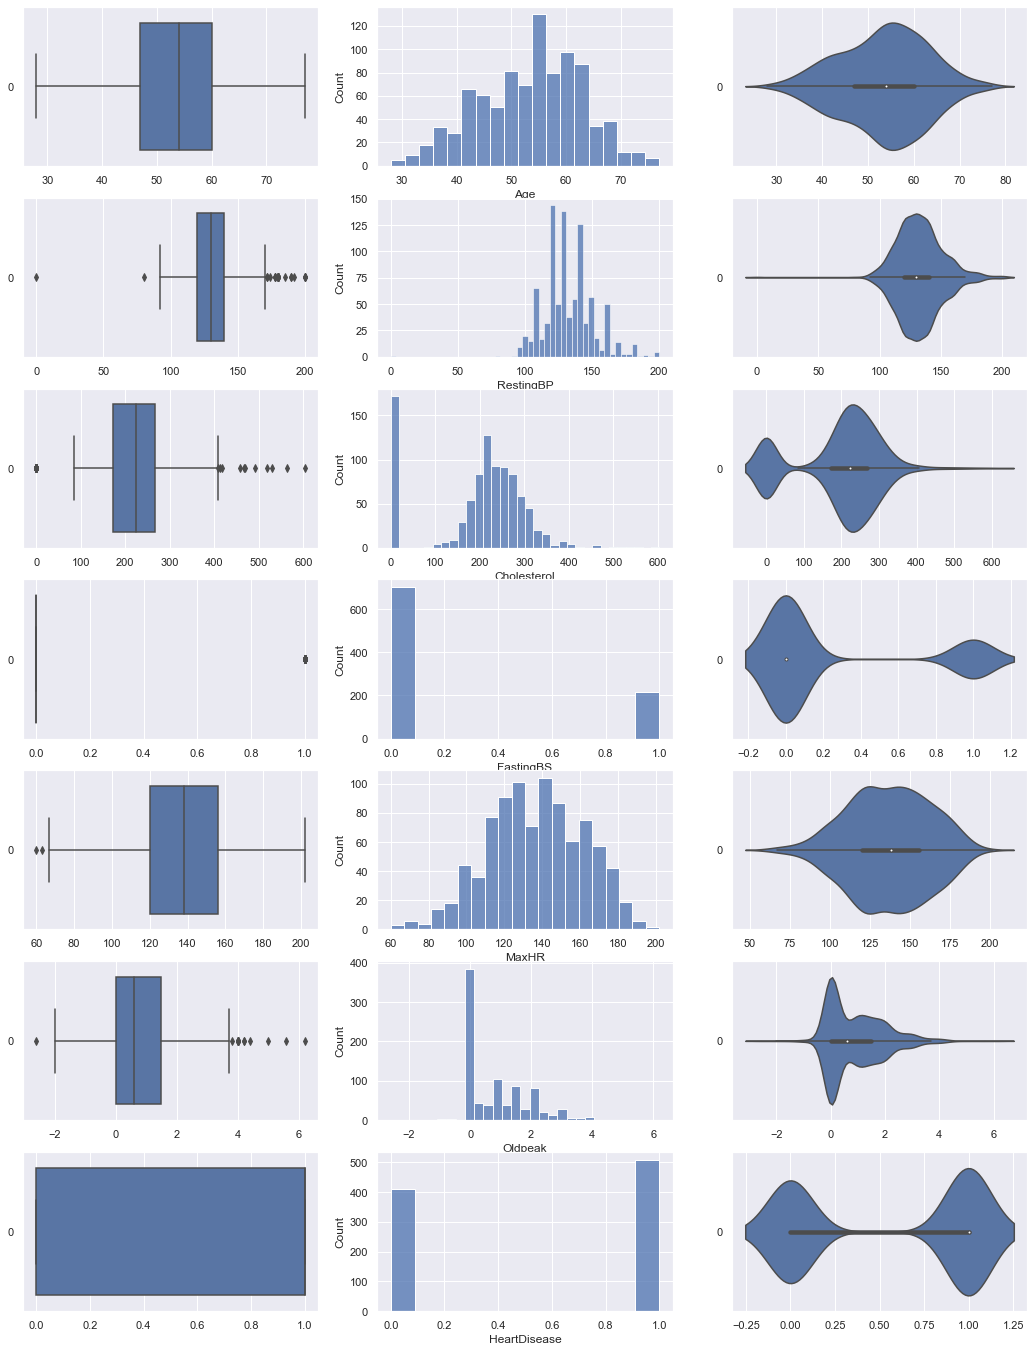

In [7]:
f, axes = plt.subplots(7, 3, figsize=(18, 24))

count = 0
for var in df:
    #Plot for numeric data only
    if df[var].dtypes == np.float64 or df[var].dtypes == np.int64:
        sb.boxplot(data = df[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = df[var], ax = axes[count,1])
        sb.violinplot(data = df[var], orient = "h", ax = axes[count,2])
        count += 1

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


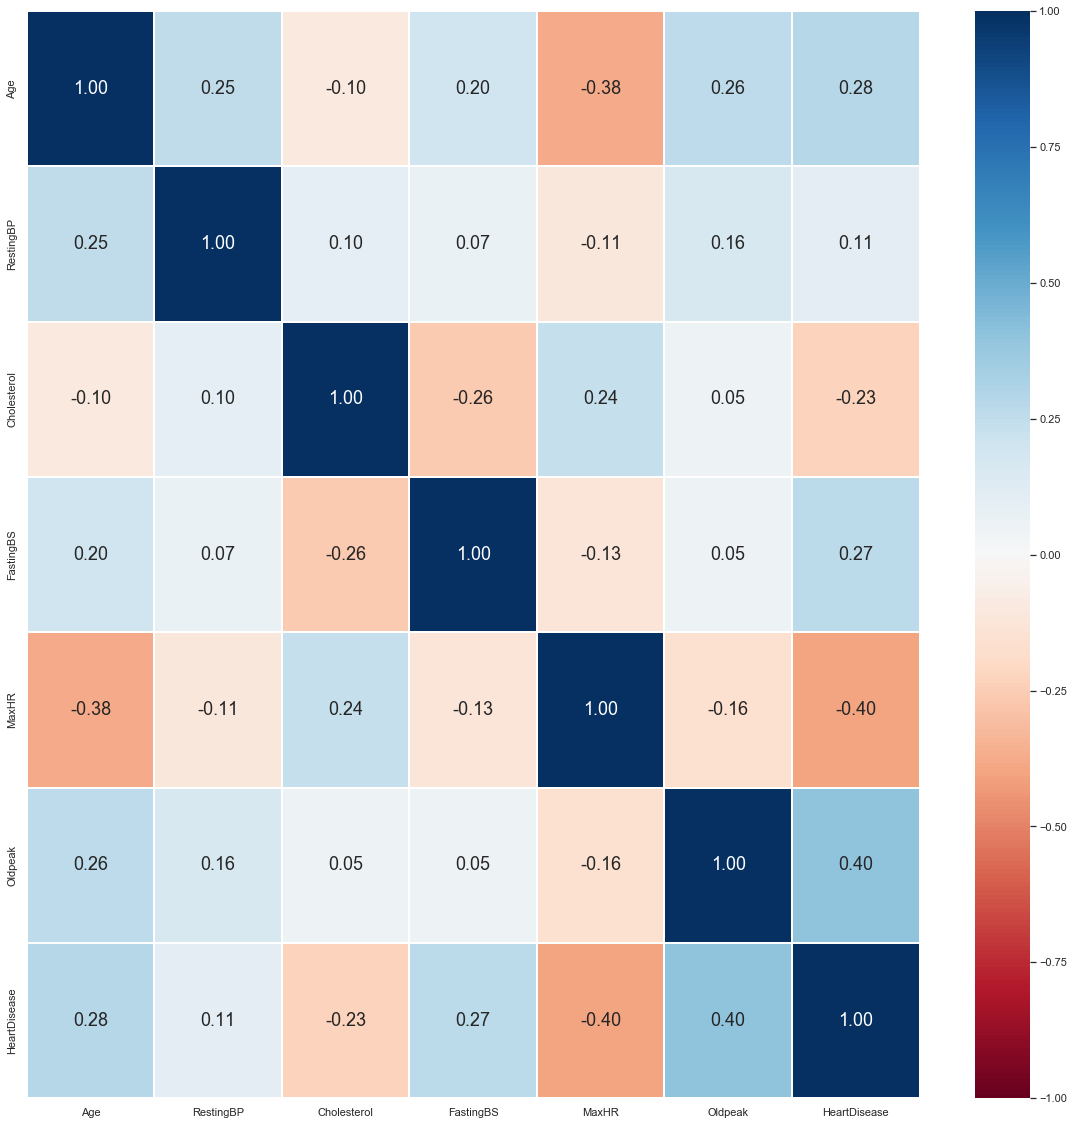

In [17]:
selected_columns = ['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df_selected = df[selected_columns]

# Correlation Matrix
print(df_selected.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df_selected.corr(), vmin=-1, vmax=1, linewidths=1,
            annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

### Cleaning Data
We found that our dataset for cholestrol has 172 rows with value 0. So we decided to remove the outliers

In [31]:
print("There are " + str(df[(df['Cholesterol'] == 0)].shape[0]) + " rows with Cholestrol 0")

There are 172 rows with Cholestrol 0


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


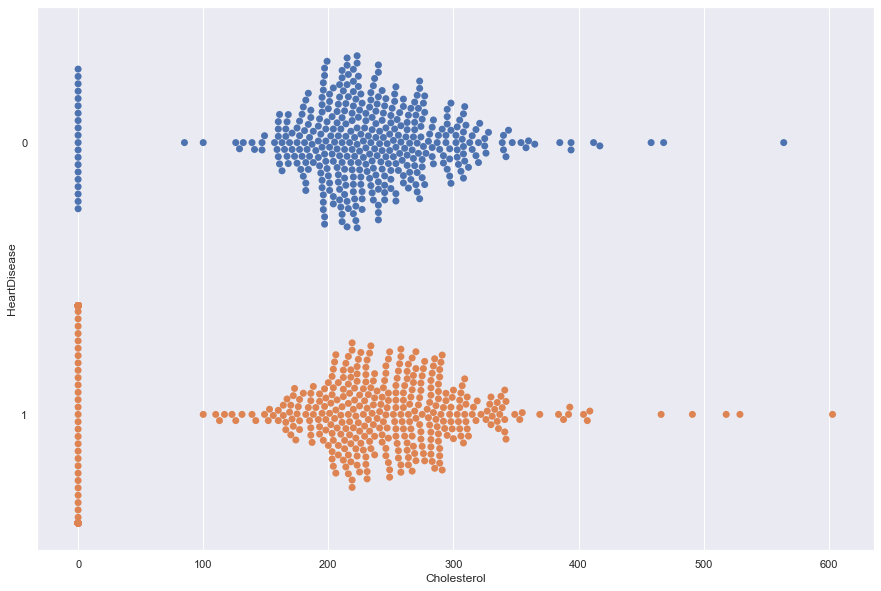

In [34]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="Cholesterol", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

## After removing

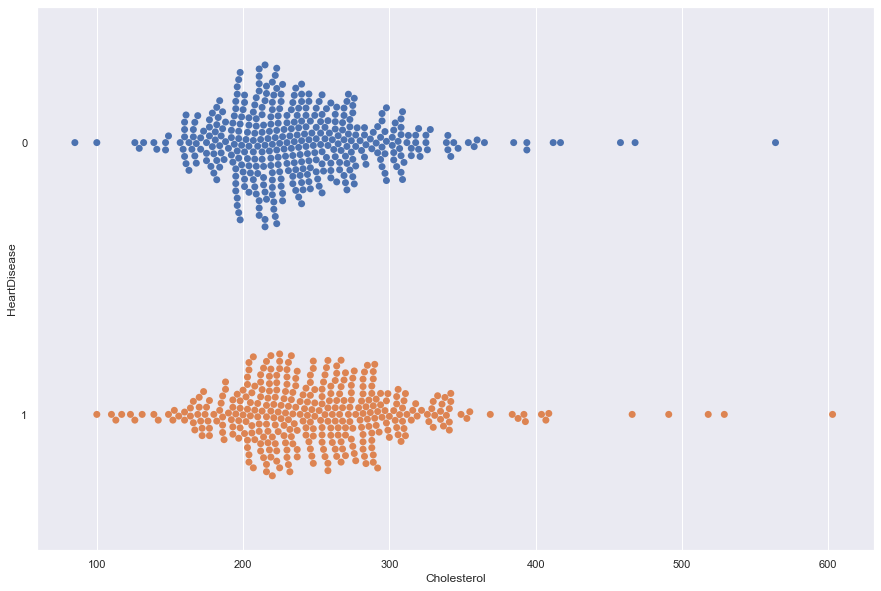

In [33]:
ch_filtered = df[df['Cholesterol'] != 0]

# Create the strip plot without outliers
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=ch_filtered, x="Cholesterol", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)
plt.show()

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.259865     0.058758   0.241338 -0.382112  0.286006   
RestingBP     0.259865   1.000000     0.095939   0.173765 -0.125774  0.198575   
Cholesterol   0.058758   0.095939     1.000000   0.054012 -0.019856  0.058488   
FastingBS     0.241338   0.173765     0.054012   1.000000 -0.102710  0.055568   
MaxHR        -0.382112  -0.125774    -0.019856  -0.102710  1.000000 -0.259533   
Oldpeak       0.286006   0.198575     0.058488   0.055568 -0.259533  1.000000   
HeartDisease  0.298617   0.173242     0.103866   0.160594 -0.377212  0.495696   

              HeartDisease  
Age               0.298617  
RestingBP         0.173242  
Cholesterol       0.103866  
FastingBS         0.160594  
MaxHR            -0.377212  
Oldpeak           0.495696  
HeartDisease      1.000000  


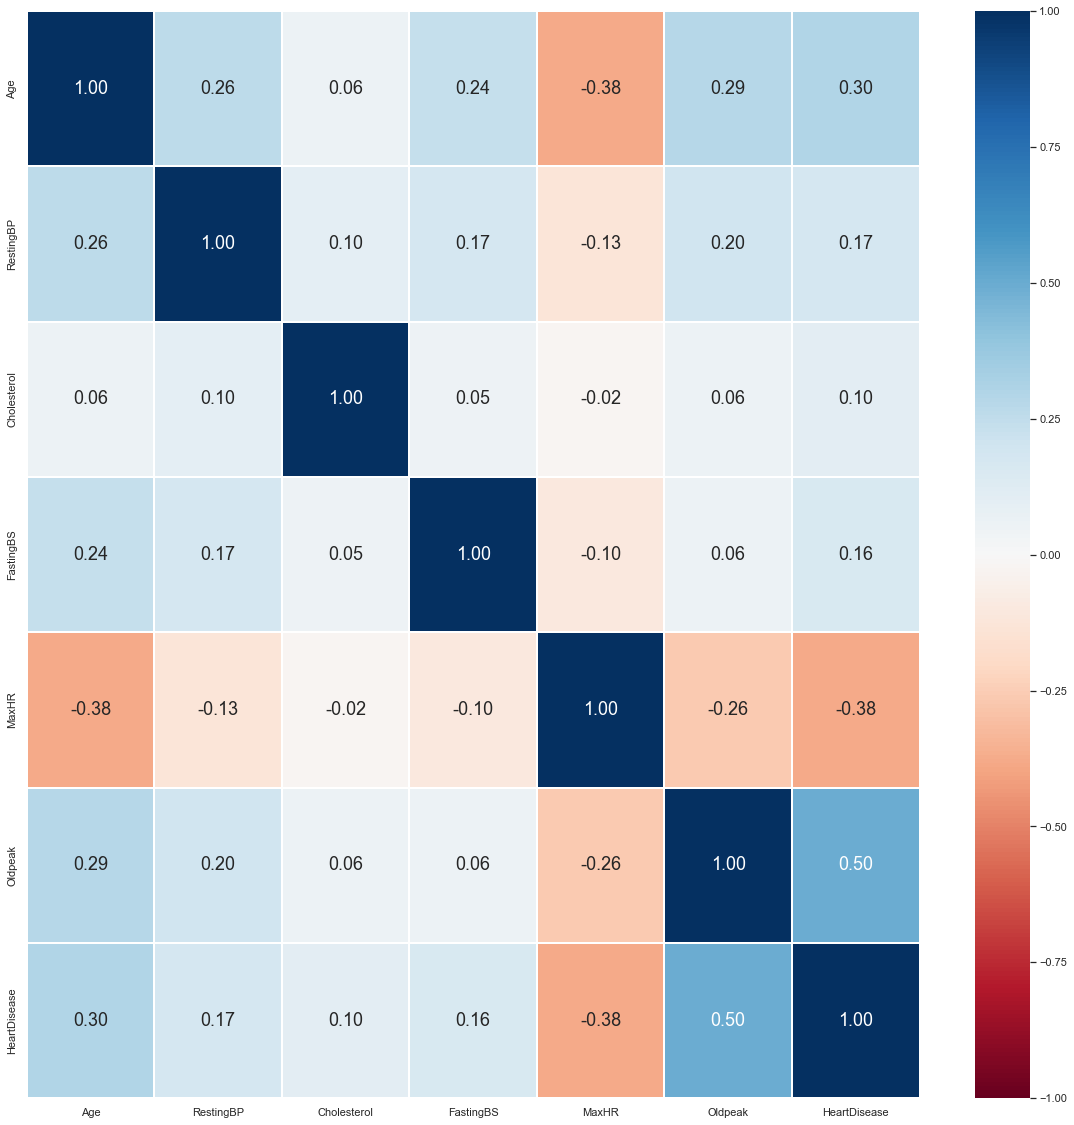

In [35]:
selected_columns = ['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df_selected = ch_filtered[selected_columns]

# Correlation Matrix
print(df_selected.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df_selected.corr(), vmin=-1, vmax=1, linewidths=1,
            annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

The correlation after removing the outlier were better for Oldpeak, Age and RestingBP. But got a bit worse for MaxHR and FastingBS

HeartFailure : 2
0    390
1    356
Name: HeartDisease, dtype: int64


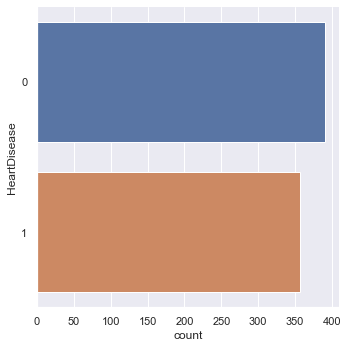

In [42]:
print("HeartFailure :", len(df["HeartDisease"].unique()))
# Get count of people with heart failure ()
print(ch_filtered["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = ch_filtered, kind = "count")

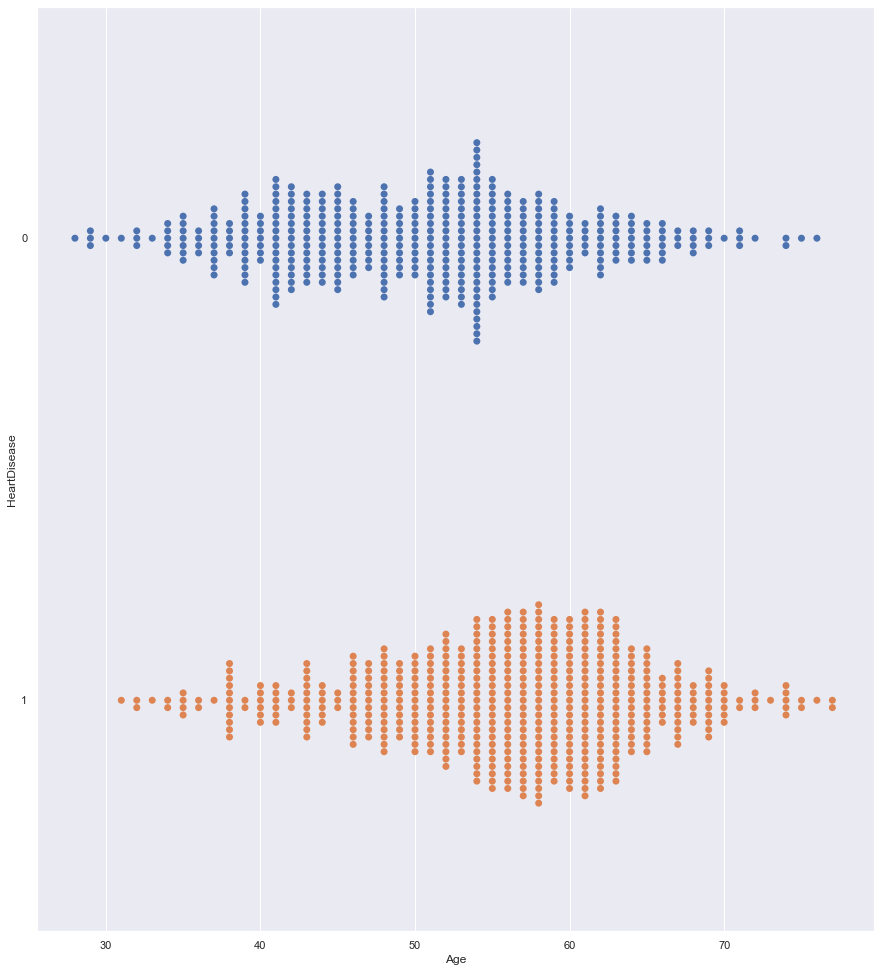

In [40]:
f = plt.figure(figsize=(15, 17)) #Before
sb.swarmplot(data=df, x="Age", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

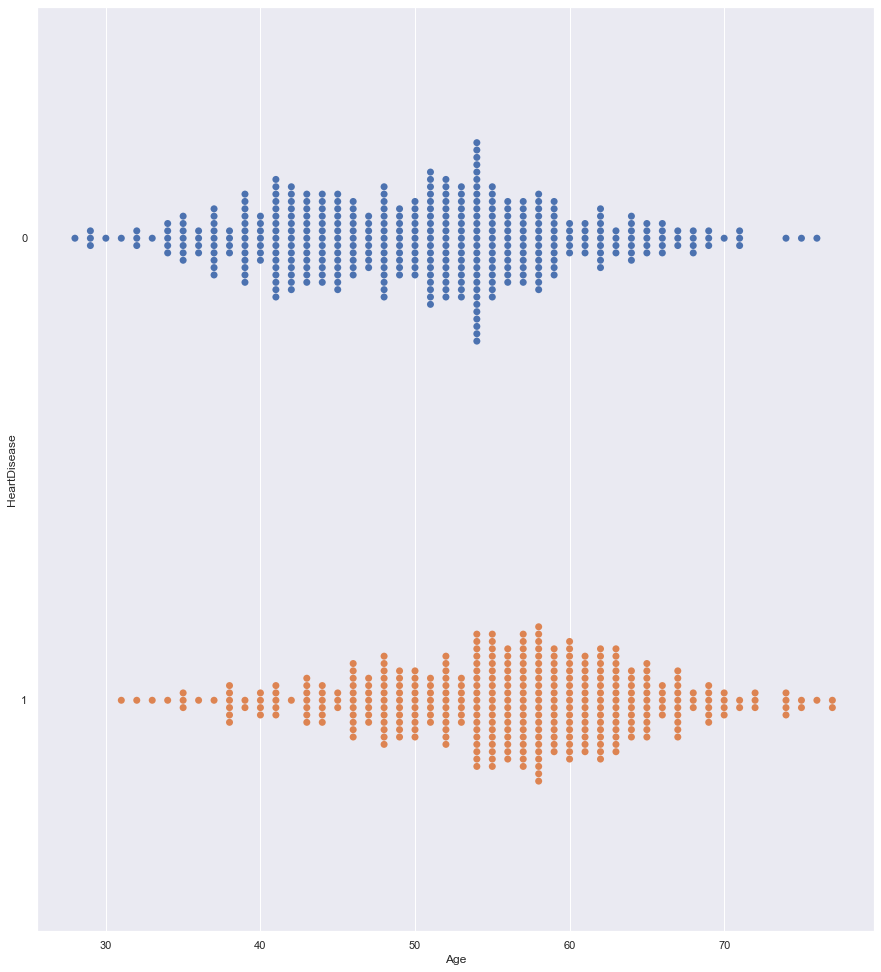

In [39]:
f = plt.figure(figsize=(15, 17)) #After
sb.swarmplot(data=ch_filtered, x="Age", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

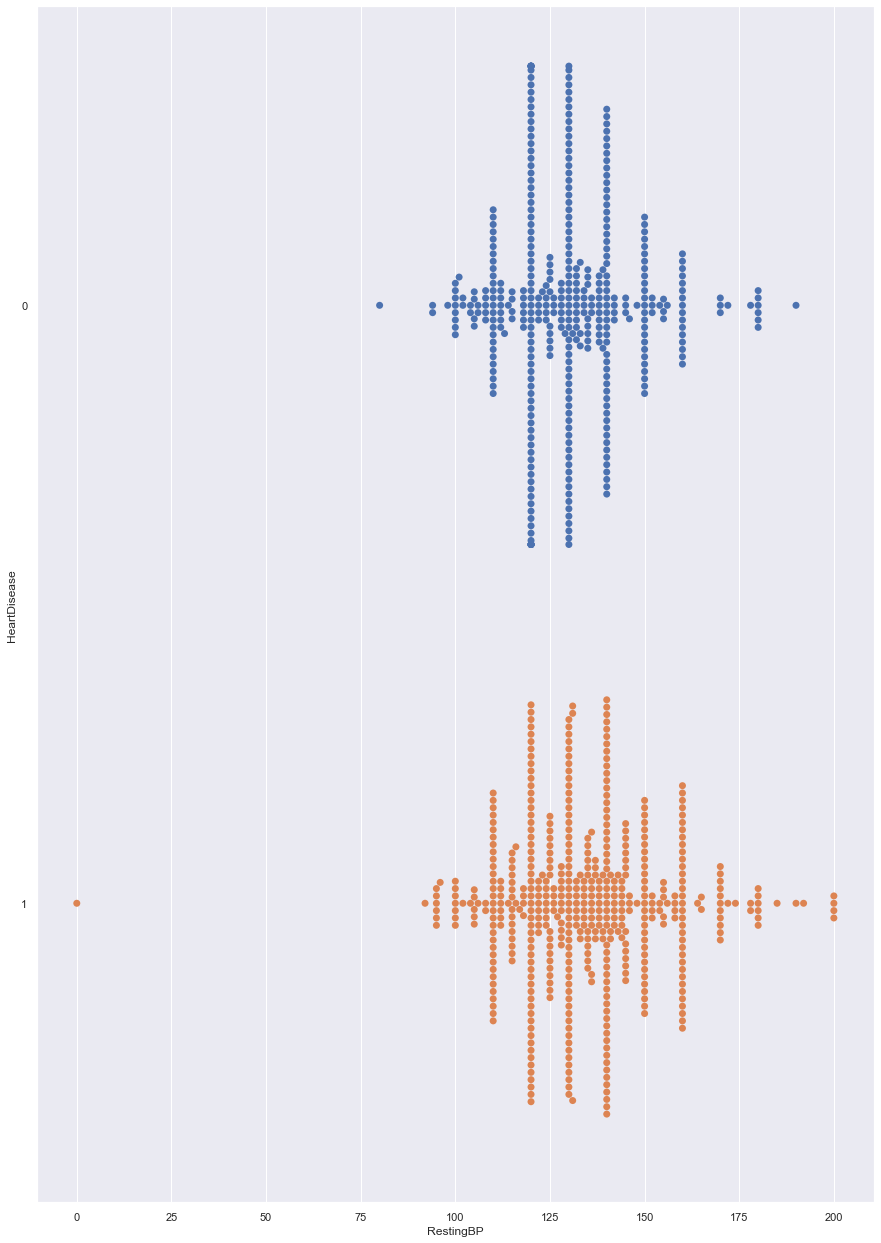

In [44]:
f = plt.figure(figsize=(15, 22)) #Before
sb.swarmplot(data=df, x="RestingBP", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

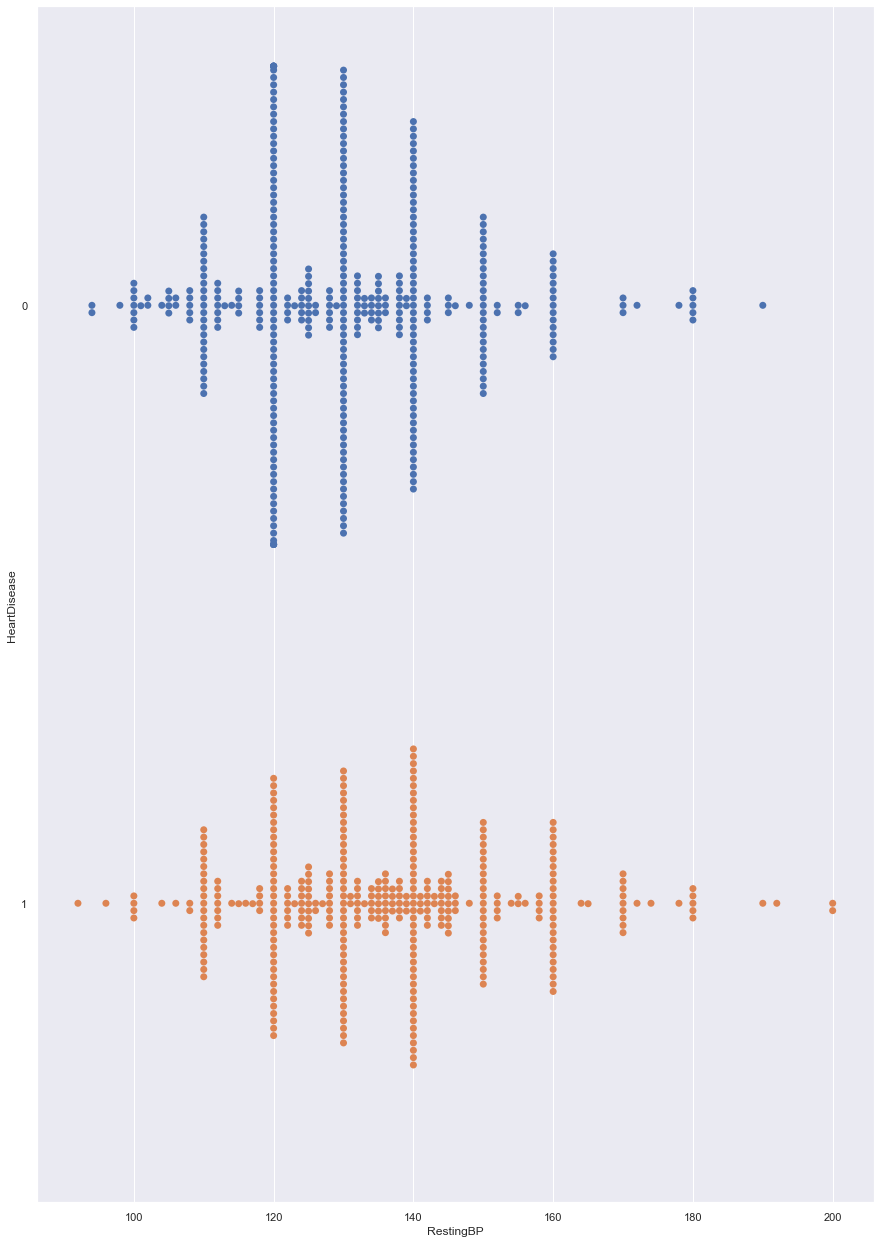

In [47]:
f = plt.figure(figsize=(15, 22)) #AFter
sb.swarmplot(data=ch_filtered, x="RestingBP", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

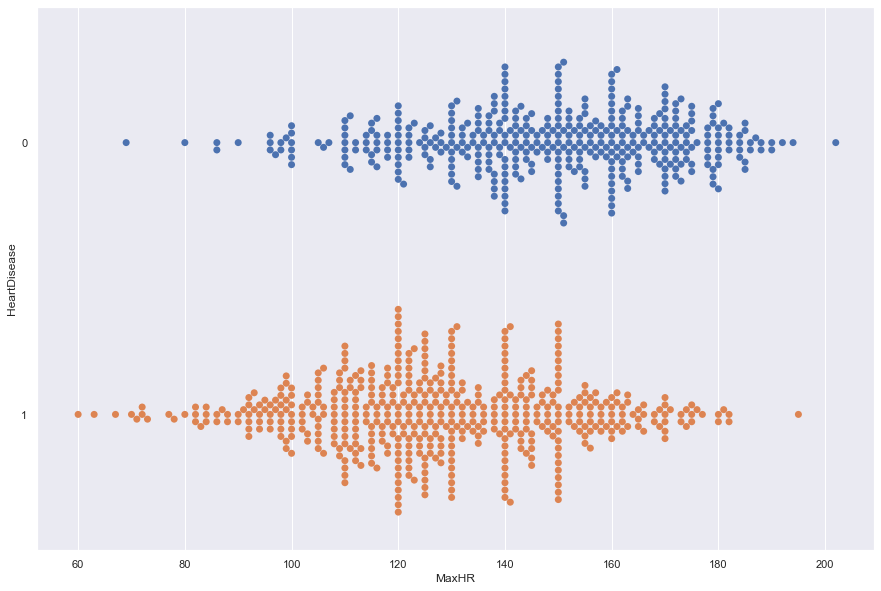

In [48]:
f = plt.figure(figsize=(15, 10)) #Before
sb.swarmplot(data=df, x="MaxHR", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

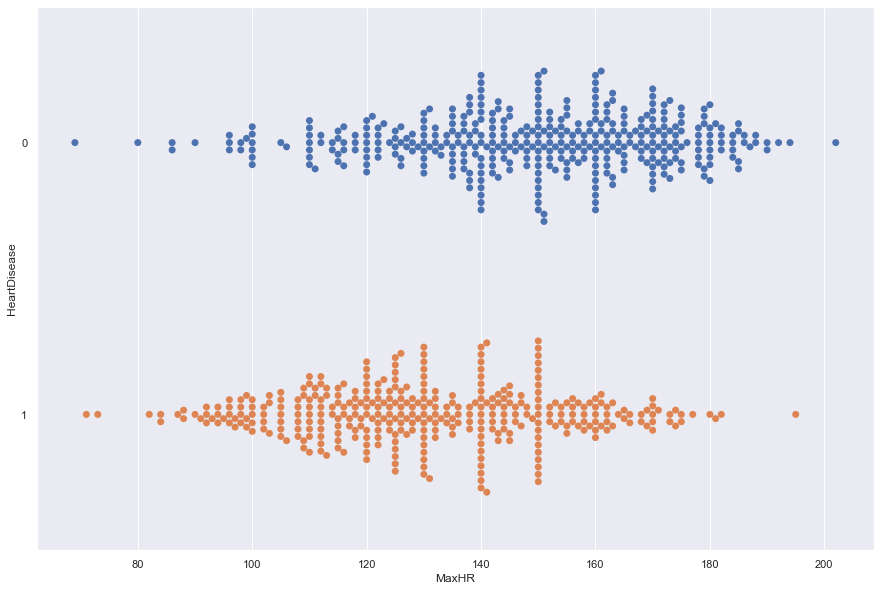

In [49]:
f = plt.figure(figsize=(15, 10)) #After
sb.swarmplot(data=ch_filtered, x="MaxHR", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


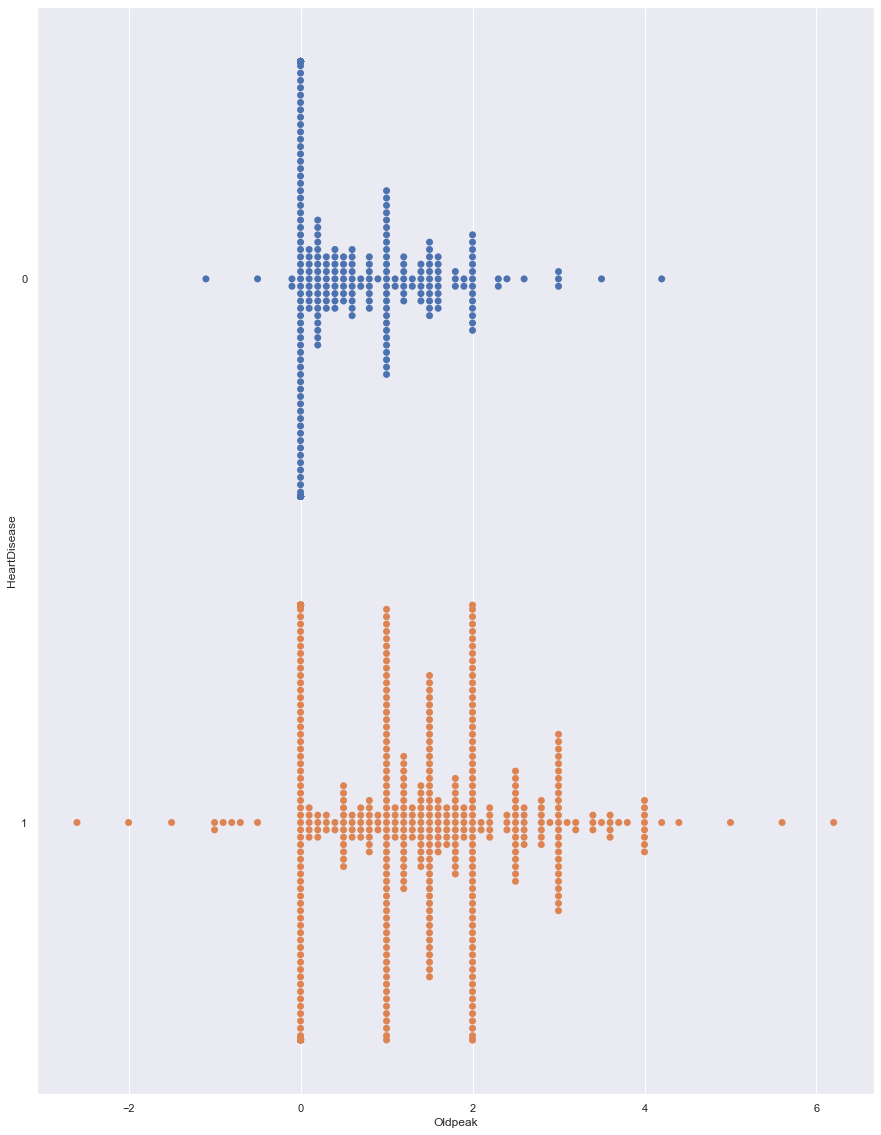

In [50]:
f = plt.figure(figsize=(15, 20)) #Before
sb.swarmplot(data=df, x="Oldpeak", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\btpy2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


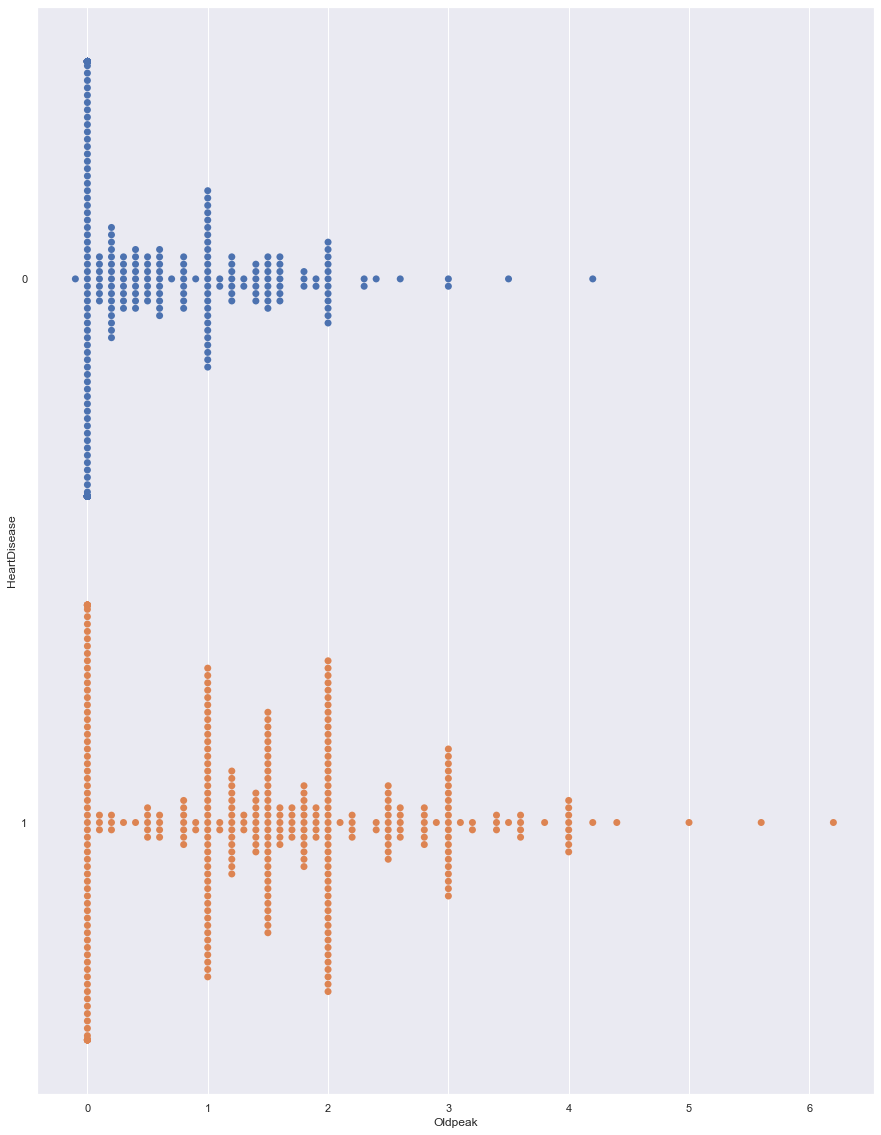

In [51]:
f = plt.figure(figsize=(15, 20)) #After
sb.swarmplot(data=ch_filtered, x="Oldpeak", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

### Ranking the usefulness of each variable
Good factors: Age, MaxHR, Oldpeak (Showed variation across different graphs for HeartDisease) 

Intercept of Regression 	: b =  [0.49488199]
Coefficients of Regression 	: a =  [[ 0.00393369  0.00065904  0.00066585  0.13949825 -0.00471383  0.17614301]]

    Predictors  Coefficients
0          Age      0.003934
1    RestingBP      0.000659
2  Cholesterol      0.000666
3    FastingBS      0.139498
4        MaxHR     -0.004714
5      Oldpeak      0.176143



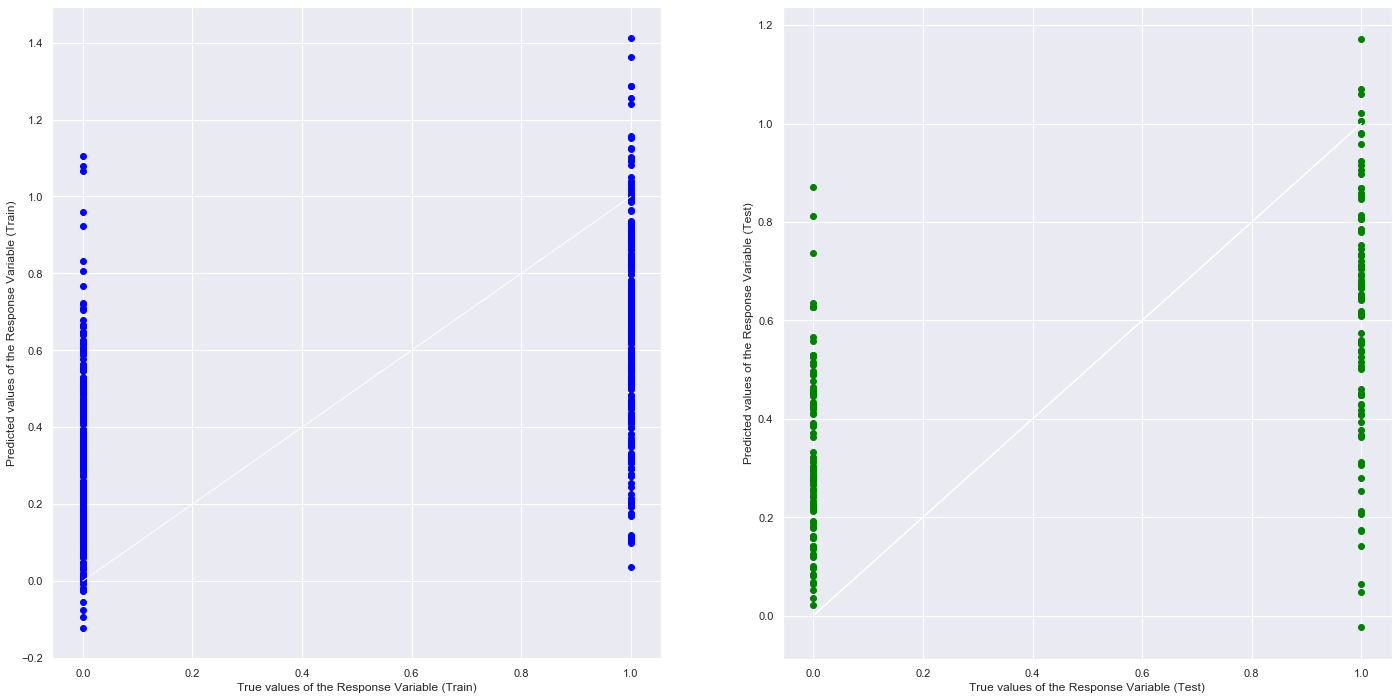

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3348485307144121
Mean Squared Error (MSE) 	: 0.16605318761450685

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3213449068582892
Mean Squared Error (MSE) 	: 0.16884381338708238



In [55]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(ch_filtered["HeartDisease"])
X = pd.DataFrame(ch_filtered[['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [0.72766012]
Coefficients of Regression 	: a =  [[ 0.00468219 -0.00474802  0.18612938]]

  Predictors  Coefficients
0        Age      0.004682
1      MaxHR     -0.004748
2    Oldpeak      0.186129



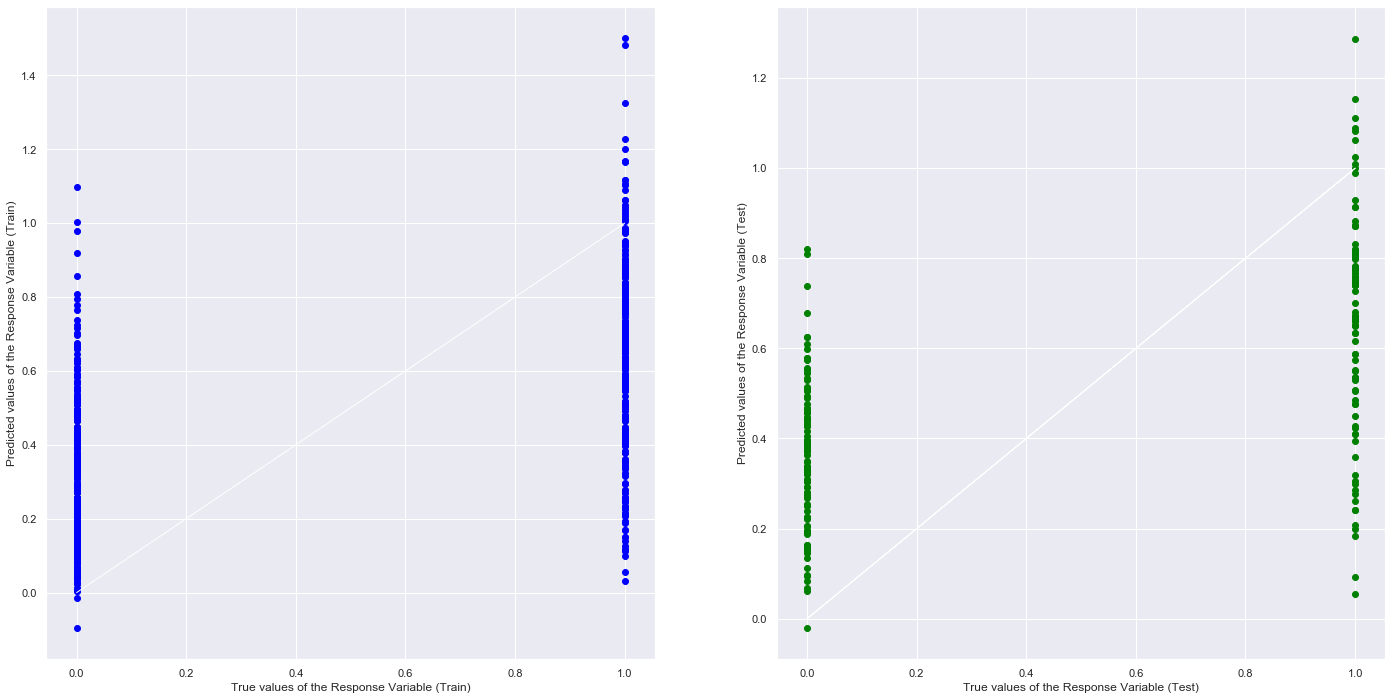

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.31754069939388474
Mean Squared Error (MSE) 	: 0.1698673502790327

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3186351087802648
Mean Squared Error (MSE) 	: 0.17029738194573726



In [54]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(ch_filtered["HeartDisease"])
X = pd.DataFrame(ch_filtered[['Age', 'MaxHR', 'Oldpeak']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()